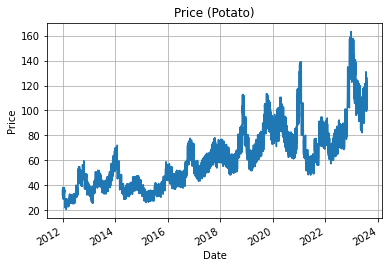

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#--------Data manipulation-----------#

df = pd.read_excel('Potato.xlsx')


#setting index
df.set_index(pd.Index(['Month','Day','Price']), inplace=True)

#transpose horizontal to vertical
df = df.T

#reset the index
df.reset_index(inplace=True)

df.rename(columns={'index': 'Year'}, inplace=True)

df['Year'].replace(r'^Unnamed.*', pd.NA, regex=True, inplace=True)
df['Year'].fillna(method='ffill', inplace=True)
df['Month'].fillna(method='ffill', inplace=True)


df['Day'] = df['Day'].astype(int)
df['Date'] = df['Year'].astype(str) + ' ' + df['Month'].astype(str) + ' ' + df['Day'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y %B %d')
df.set_index('Date', inplace=True)

#drops the column
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

df['Price'] = df['Price'].astype(float)
ts = pd.Series(data=df['Price'])

#ploting
ts.plot(title='Price (Potato)', xlabel='Date', ylabel='Price')
plt.autoscale()
plt.grid(which='both')
plt.show()

ts_diff = ts.diff().dropna()

df= np.log(df)

df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)  # Make sure the index is sorted

# Set frequency explicitly
df = df.asfreq('D')


## Monthly and Weekly Forecasting and graphing

In [2]:
# Import necessary libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming 'df' is your DataFrame with the time series data

# Monthly Forecast

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Set frequency explicitly
df_monthly.index.freq = 'M'

# Fit the ARIMA model (replace with your chosen order)
order_monthly = (38,1,46)  # Example order, you may need to adjust this based on your data and analysis
model_monthly = sm.tsa.ARIMA(df_monthly['Price'], order=order_monthly)
results_monthly = model_monthly.fit()




Forecasted Values (Monthly Frequency) - First Day of Each Month
      Date  Forecasted Value
2023-08-01            128.30
2023-09-01            137.15
2023-10-01            150.69
2023-11-01            165.02
2023-12-01            177.10
2024-01-01            158.65
2024-02-01            127.00
2024-03-01            123.70
2024-04-01            122.21
2024-05-01            113.25
2024-06-01             98.57
2024-07-01            125.39


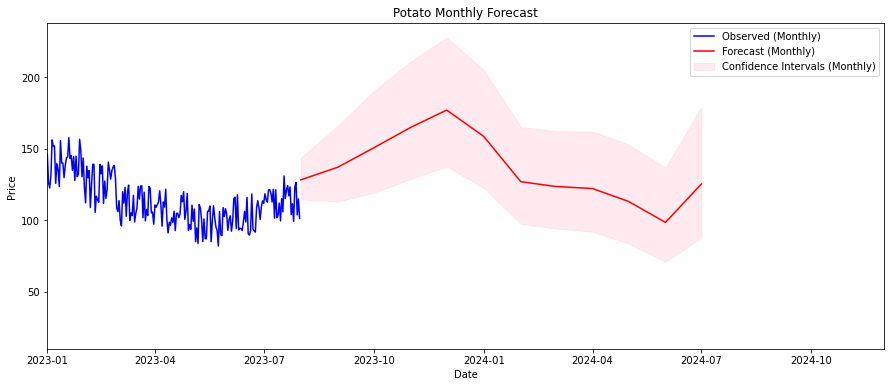

In [16]:
# Import necessary libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# (Previous code remains unchanged)

# Forecast future values (replace steps with the number of steps you want to forecast)
forecast_steps_monthly = 12  # Assuming you want to forecast 12 months (1 year)
forecast_monthly = results_monthly.get_forecast(steps=forecast_steps_monthly)

# Get the predicted values, confidence intervals, and dates
predicted_values_monthly = forecast_monthly.predicted_mean
confidence_intervals_monthly = forecast_monthly.conf_int()
# (Previous code remains unchanged)

# Update the start date for forecast_dates_monthly to start from July 1st, 2023
forecast_dates_monthly = pd.date_range(start='2023-08-01', periods=forecast_steps_monthly, freq='MS')


# Convert log-transformed values back to original scale
forecasted_values_original_scale_monthly = np.exp(predicted_values_monthly)

# Extract forecasted values as a list
forecasted_values_list_monthly = forecasted_values_original_scale_monthly.tolist()

# (Rest of the code remains unchanged)

# Create a DataFrame with the adjusted forecasted dates and values
forecast_table_monthly_adjusted = pd.DataFrame({
    'Date': forecast_dates_monthly,
    'Forecasted Value': forecasted_values_list_monthly
})
       
#forecast_table_monthly_adjusted['Percentage Change'] = forecast_table_monthly_adjusted['Forecasted Value'].pct_change() * 100
#forecast_table_monthly_adjusted['Percentage Change'] = forecast_table_monthly_adjusted['Percentage Change'].fillna(0)
#forecast_table_monthly_adjusted[''] = [' ↑' if change > 0 else (' ↓' if change < 0 else '') for change in forecast_table_monthly_adjusted['Percentage Change']]

# Print the table with float formatting to two decimal places and arrows
print('Forecasted Values (Monthly Frequency) - First Day of Each Month')
print(forecast_table_monthly_adjusted.to_string(index=False, float_format='%.2f'))

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(ts, label='Observed (Monthly)', color='blue')
plt.plot(forecast_dates_monthly, forecasted_values_original_scale_monthly, label='Forecast (Monthly)', color='red')
plt.fill_between(forecast_dates_monthly, np.exp(confidence_intervals_monthly.iloc[:, 0]), np.exp(confidence_intervals_monthly.iloc[:, 1]),
                 color='pink', alpha=0.3, label='Confidence Intervals (Monthly)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Potato Monthly Forecast')
plt.xlim(pd.Timestamp('2023-01-01'), forecast_dates_monthly[-1] + pd.DateOffset(months=5))  # Adjust x-axis limits

plt.show()

In [14]:
# Import necessary libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

# Weekly Forecast

# Resample the data to weekly frequency and calculate the mean
df_weekly = df.resample('W').mean()

# Set frequency explicitly
df_weekly.index.freq = 'W'

df_weekly = df_weekly.fillna(method='ffill')

# Fit the ARIMA model (replace with your chosen order)
order_weekly = (38,1,46)  # Example order, you may need to adjust this based on your data and analysis
model_weekly = sm.tsa.ARIMA(df_weekly['Price'], order=order_weekly)
results_weekly = model_weekly.fit()


Forecasted Values (Weekly Frequency)
      Date  Forecasted Value
2023-08-01            107.27
2023-08-08            102.64
2023-08-15            105.88
2023-08-22            108.85
2023-08-29            114.60
2023-09-05            115.41
2023-09-12            112.60
2023-09-19            119.39
2023-09-26            118.89
2023-10-03            120.87


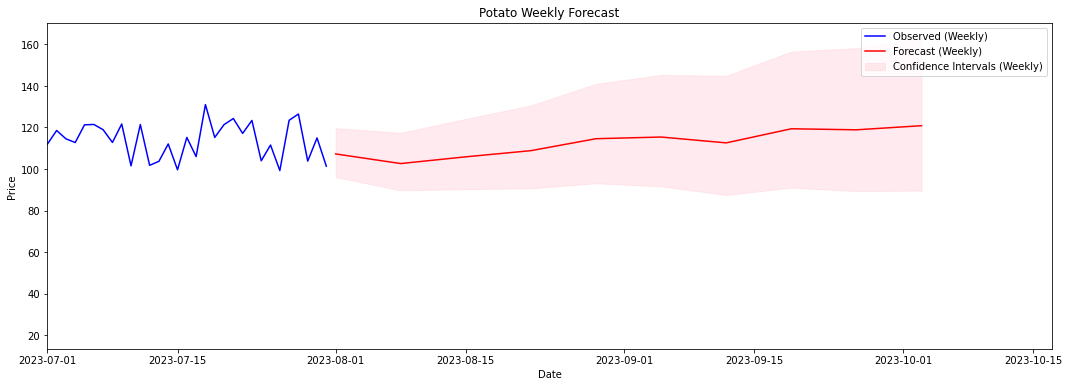

In [17]:
# Import necessary libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

# Forecast future values (replace steps with the number of steps you want to forecast)
forecast_steps_weekly = 10  # Forecasting 18 weeks (approximately 4 months starting from August 1st, 2023)
forecast_weekly = results_weekly.get_forecast(steps=forecast_steps_weekly)

# Get the predicted values, confidence intervals, and dates
predicted_values_weekly = forecast_weekly.predicted_mean
confidence_intervals_weekly = forecast_weekly.conf_int()

# Update the start date for forecast_dates_weekly to start from August 1st, 2023, each Tuesday
start_date_weekly = pd.Timestamp('2023-08-01')
forecast_dates_weekly = pd.date_range(start=start_date_weekly, periods=forecast_steps_weekly, freq='W-TUE')


# Convert log-transformed values back to the original scale
forecasted_values_original_scale_weekly = np.exp(predicted_values_weekly)

forecasted_values_list_weekly = forecasted_values_original_scale_weekly.tolist()

# Create a DataFrame with the forecasted values and dates
forecast_table_weekly = pd.DataFrame({
    'Date': forecast_dates_weekly,
    'Forecasted Value': forecasted_values_list_weekly
})

# Calculate the percentage change and add it to the DataFrame
#forecast_table_weekly['Percentage Change'] = forecast_table_weekly['Forecasted Value'].pct_change() * 100

# Replace NaN with 0 in the 'Percentage Change' column
#forecast_table_weekly['Percentage Change'] = forecast_table_weekly['Percentage Change'].fillna(0)

# Add arrows based on the direction of percentage change
#forecast_table_weekly[''] = [' ↑' if change > 0 else (' ↓' if change < 0 else '') for change in forecast_table_weekly['Percentage Change']]

# Print the table with float formatting to two decimal places and arrows
print('Forecasted Values (Weekly Frequency)')
print(forecast_table_weekly.to_string(index=False, float_format='%.2f'))
    
# Weekly Plot
plt.figure(figsize=(18, 6))
plt.plot(ts, label='Observed (Weekly)', color='blue')
plt.plot(forecast_dates_weekly, forecasted_values_original_scale_weekly, label='Forecast (Weekly)', color='red')
plt.fill_between(forecast_dates_weekly, np.exp(confidence_intervals_weekly.iloc[:, 0]), np.exp(confidence_intervals_weekly.iloc[:, 1]),
                 color='pink', alpha=0.3, label='Confidence Intervals (Weekly)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Potato Weekly Forecast')
plt.xlim(pd.Timestamp('2023-07-01'), forecast_dates_weekly[-1] + pd.DateOffset(weeks=2))  # Adjust x-axis limits

plt.show()
